## Vehicle Sales Prediction

### Group Members
1. ABDUL HAMEED AQIB MOHAMMED - C0926951
2. ISMAIL ASIM MOHAMMED - C0926378
3. ALI NUSRATH KHUNDMIRI SYED - C0925004

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing warnings to ignore deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading our dataset into a dataframe called df.
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
# Getting statistical data of the dataset
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
# Checking for null values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

### Handling Null values in Categorical Data

In [6]:
"""Handling Null Values In Categorical Columns
When dealing with a categorical column like 'make' with a significant number of null values,
filling them requires careful consideration.
Since 'make' represents the brand or manufacturer of the vehicle,
blindly filling null values with the most common value may introduce bias.

1. Fill with a Placeholder Category
2. Use Mode, Median, Mean (most frequent category)
3. Remove Null values
We are going to use all of the above Imputation techniques to our columns"""

# fill with 'Other' category
df['make'].fillna('Other', inplace=True)
df['model'].fillna('Other', inplace=True)
df['trim'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)

In [7]:
# fill with 'mode'
df['body'].fillna(df.body.mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['interior'].fillna(df['interior'].mode()[0], inplace=True)

In [8]:
# remove null values
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)

In [9]:
df.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11816
odometer           94
color               0
interior            0
seller              0
mmr                22
sellingprice        0
saledate            0
dtype: int64

### Handling Null values in Numerical Data

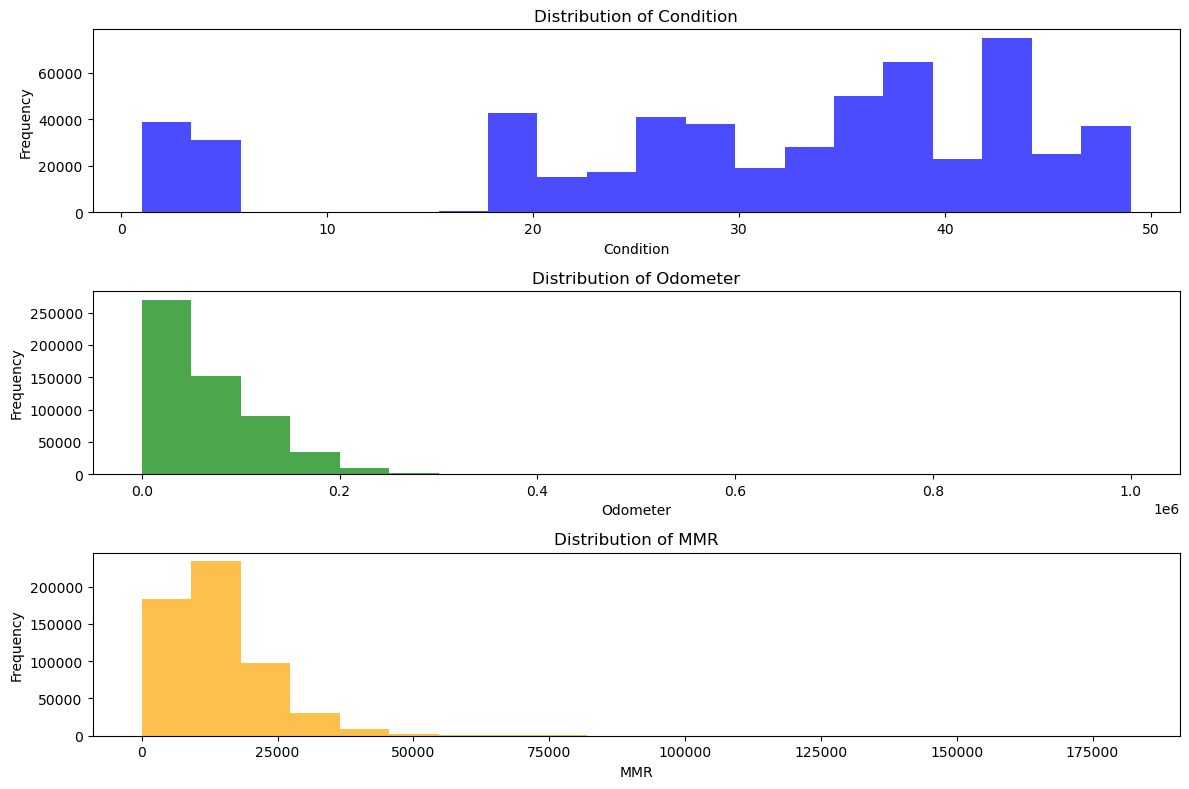

In [10]:
# Plotting histogram for numerical columns to check where the most values lie and get some insights.

plt.figure(figsize=(12, 8))

# Plot histogram for 'condition'
plt.subplot(3, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# Plot histogram for 'odometer'
plt.subplot(3, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

# Plot histogram for 'mmr'
plt.subplot(3, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='orange', alpha=0.7)
plt.title('Distribution of MMR')
plt.xlabel('MMR')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# After visualizing the above histograms. We have decided to select fill missing values of condition column with median and
# fill missing values of odometer and mmr with mean.

df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)

In [12]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [13]:
# Check for duplicate values
duplicate_rows = df[df.duplicated()]
duplicate_rows.sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
vin               0
state             0
condition       0.0
odometer        0.0
color             0
interior          0
seller            0
mmr             0.0
sellingprice    0.0
saledate          0
dtype: object

In [14]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558821.000000,558821.000000,558821.000000,558821.000000,558821.000000
mean,2010.038828,30.764059,68321.141250,13769.377495,13611.358176
std,3.966874,13.275023,53394.310676,9679.776628,9749.536466
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52268.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99104.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Handling Outliers

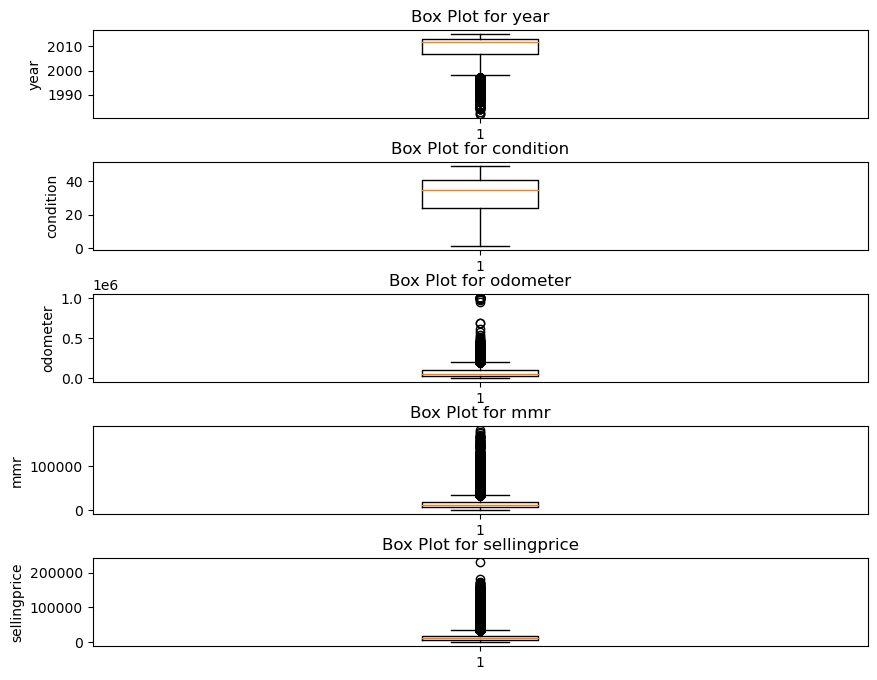

In [15]:
# Plotting box plot for numerical columns to check for outliers.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [16]:
# We can see that there are outliers in our dataset.
# We will try to reduce outliers using Z-score
from scipy import stats
z_scores = stats.zscore(df[numerical_columns])
clean_df = df[(z_scores < 2).all(axis=1)]
clean_df.shape

(511816, 16)

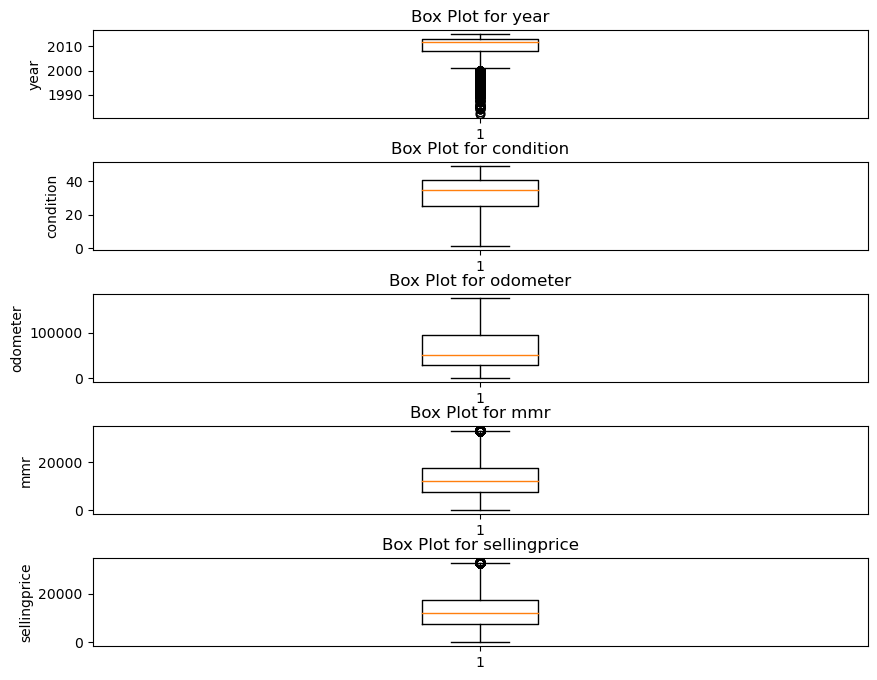

In [17]:
# Plotting box plot again for numerical columns to check whether the outliers were reduced.
numerical_columns = clean_df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [18]:
clean_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [19]:
clean_df.describe()

,year,condition,odometer,mmr,sellingprice
count,511816.000000,511816.000000,511816.000000,511816.000000,511816.000000
mean,2010.237798,31.030118,63351.716578,13029.954811,12861.592033
std,3.704200,13.043716,43007.915008,7230.515564,7331.708638
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,25.000000,28792.000000,7675.000000,7400.000000
50%,2012.000000,35.000000,51633.000000,12300.000000,12100.000000
75%,2013.000000,41.000000,94396.500000,17650.000000,17600.000000
max,2015.000000,49.000000,175107.000000,33100.000000,33100.000000


In [20]:
# We are performing MinMaxScaler and LabelEncoder to normalize our data

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

normalized_df = clean_df.copy()

# Numerical columns to be normalized
numerical_cols = ['year', 'condition', 'odometer', 'mmr']

# Categorical columns to be encoded
categorical_cols = [col for col in clean_df.columns if col not in numerical_cols]

# Encode categorical features using Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    normalized_df[col] = le.fit_transform(clean_df[col])
    
# Normalize numerical features using Min-Max Scaling
for col in numerical_cols:
    scaler = MinMaxScaler()
    normalized_df[col] = scaler.fit_transform(clean_df[[col]])

In [21]:
normalized_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,1.000000,20,600,906,33,1,373764,25,0.083333,0.095017,40,1,6787,0.619048,797,1743
1,1.000000,20,600,906,33,1,373756,25,0.083333,0.053636,40,0,6787,0.628118,797,1743
2,0.969697,2,8,273,34,1,467824,25,0.916667,0.007595,30,1,4691,0.963719,1057,1138
3,1.000000,44,544,1277,34,1,500605,25,0.833333,0.081556,40,1,12992,0.830688,995,1233
5,1.000000,30,68,116,34,1,175740,25,0.000000,0.031712,30,1,4345,0.463341,408,1809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558830,0.909091,30,568,65,34,1,297759,54,0.520833,0.204773,40,6,8753,0.300076,384,3253
558831,0.878788,2,27,435,34,1,470151,27,0.791667,0.379210,40,3,7089,0.613001,838,2119
558833,0.909091,36,6,1013,10,1,267498,58,0.083333,0.310623,40,1,6097,0.912320,1075,3246
558835,1.000000,30,68,116,72,1,175117,28,0.770833,0.095125,40,1,4345,0.455782,416,1269


<Axes: >

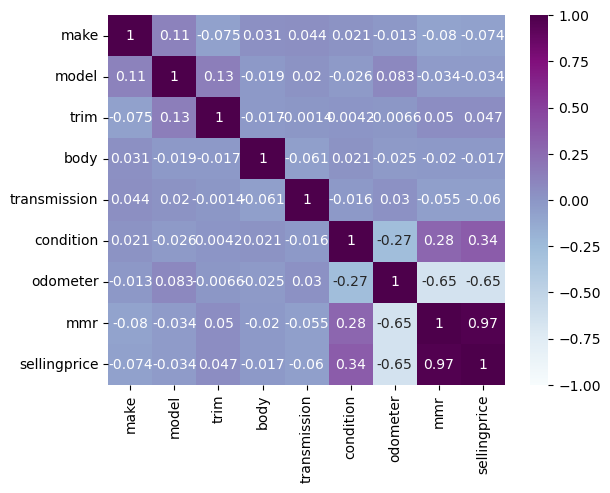

In [22]:
# using heatmap() function to get a correlation map
corr = normalized_df[["make", "model", "trim", "body", "transmission", "condition", "odometer", "mmr", "sellingprice"]].corr()
sns.heatmap(corr,cmap='BuPu',vmin=-1,vmax=1,annot=True)

In [23]:
# Feature Selection
independant_variables = ["make", "model", "trim", "body", "transmission", "condition", "odometer", "mmr"]
dependant_variable = ["sellingprice"]

In [24]:
X = normalized_df[independant_variables]
y = normalized_df[dependant_variable]

In [25]:
from sklearn.model_selection import train_test_split

# Splitting our data into train(80%) and test(20%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn.linear_model import LinearRegression

# Initializing our model
lr_model=LinearRegression()

lr_model.fit(X_train,y_train)

lr_y_pred=lr_model.predict(X_test)
lr_y_pred

array([[ 508.66601088],
       [ 880.38023152],
       [ 529.86077922],
       ...,
       [ 246.42506619],
       [1072.76912163],
       [ 505.05404411]])

In [27]:
# Calculating all the important Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"Mean Absolute Error: {mean_absolute_error(y_test,lr_y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,lr_y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,lr_y_pred))}")
print(f"R2 Score: {r2_score(y_test,lr_y_pred)}")

Mean Absolute Error: 38.41604886294592
Mean Squared Error: 3231.4801610775007
Root Mean Squared Error: 56.846109462983485
R2 Score: 0.955041712403156


In [28]:
lr_metrics = {
    'Model': 'Linear Regression',
    'Mean Squared Error (MSE)': mean_squared_error(y_test, lr_y_pred),
    'Mean Absolute Error (MAE)': mean_absolute_error(y_test, lr_y_pred),
    'Root Mean Squared Error(RMSE)': np.sqrt(mean_squared_error(y_test,lr_y_pred)),
    'R-squared (R2)': r2_score(y_test, lr_y_pred)
}

<Axes: ylabel='Count'>

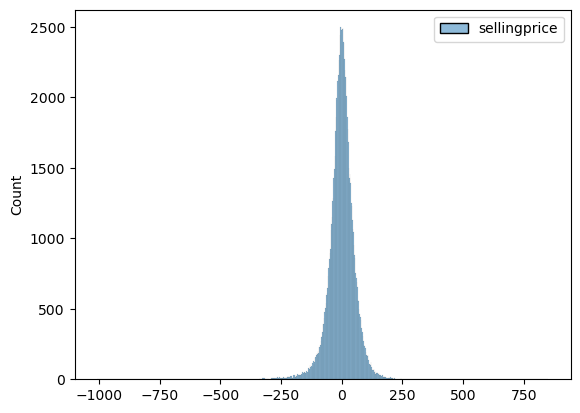

In [29]:
# calculating the residuals and plotting a histogram for it
# residuals = Actual Price - Predicted Price
lr_residuals = y_test-lr_y_pred
sns.histplot(lr_residuals, stat='count')

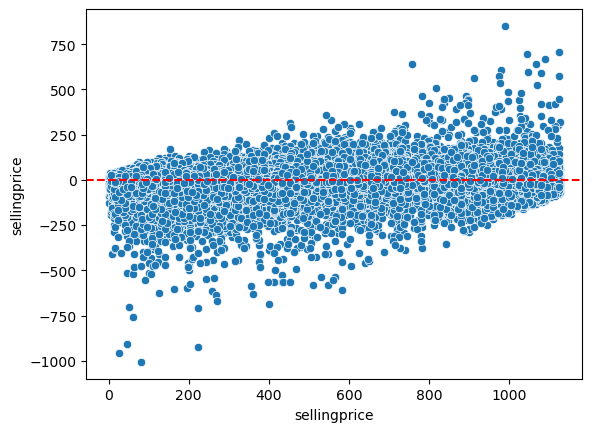

In [30]:
# Plotting a scatterplot betweeen y_test and residuals
sns.scatterplot(x=y_test['sellingprice'],y=lr_residuals['sellingprice'])
plt.axhline(y=0, color='r', linestyle='--')

In [31]:
from xgboost import XGBRegressor

n_estimators = 100   # Number of boosting rounds
learning_rate = 0.1  # Step size shrinkage to prevent overfitting
max_depth = 3        # Maximum depth of the trees
xg_model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
xg_model.fit(X_train,y_train)
xg_y_pred = xg_model.predict(X_test)
xg_y_pred

array([ 514.3935 ,  878.72217,  547.8634 , ...,  223.2444 , 1003.677  ,
        512.595  ], dtype=float32)

In [32]:
# Calculating all the important Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"Mean Absolute Error: {mean_absolute_error(y_test,xg_y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,xg_y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,xg_y_pred))}")
print(f"R2 Score: {r2_score(y_test,xg_y_pred)}")

Mean Absolute Error: 33.147726084708296
Mean Squared Error: 2445.7464620089654
Root Mean Squared Error: 49.45448879534562
R2 Score: 0.9659733102643283


In [33]:
xg_metrics = {
    'Model': 'XGBoost',
    'Mean Squared Error (MSE)': mean_squared_error(y_test, xg_y_pred),
    'Mean Absolute Error (MAE)': mean_absolute_error(y_test, xg_y_pred),
    'Root Mean Squared Error(RMSE)': np.sqrt(mean_squared_error(y_test,xg_y_pred)),
    'R-squared (R2)': r2_score(y_test, xg_y_pred)
}

In [34]:
# Reshaping the predicted values to flatten out the values.
xg_y_pred=xg_y_pred.reshape(102364,1)

<Axes: ylabel='Count'>

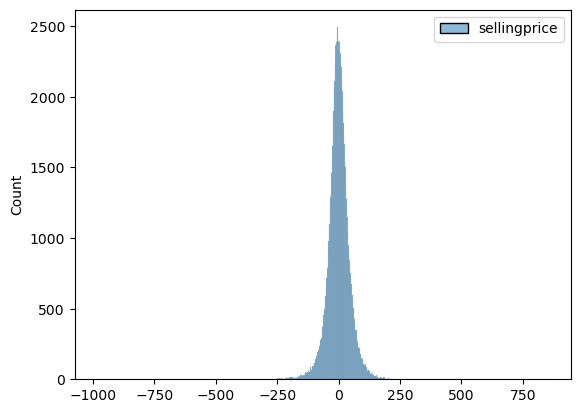

In [35]:
# calculating the residuals and plotting a histogram for it
# residuals = Actual Price - Predicted Price
xg_residuals = y_test - xg_y_pred
sns.histplot(xg_residuals, stat='count')

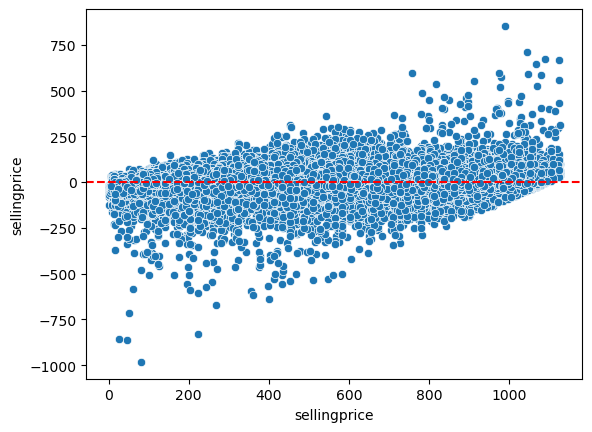

In [36]:
# Plotting a scatterplot betweeen y_test and residuals
sns.scatterplot(x=y_test['sellingprice'],y=xg_residuals['sellingprice'])
plt.axhline(y=0, color='r', linestyle='--')

In [37]:
# Creating a dataframe which has the metrics for both the models.
metrics_df = pd.DataFrame([lr_metrics, xg_metrics])
metrics_df

,Model,Mean Squared Error (MSE),Mean Absolute Error (MAE),Root Mean Squared Error(RMSE),R-squared (R2)
0,Linear Regression,3231.480161,38.416049,56.846109,0.955042
1,XGBoost,2445.746462,33.147726,49.454489,0.965973
